In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\downlod\Bengaluru_House_Data.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.duplicated().sum()

529

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(12791, 9)

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [8]:
df.drop(columns=["balcony","society","area_type","availability"],inplace=True)

In [9]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df.describe()

,bath,price
count,12718.000000,12791.000000
mean,2.708602,114.317646
std,1.357764,151.480310
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,73.000000
75%,3.000000,121.000000
max,40.000000,3600.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12790 non-null  object 
 1   size        12775 non-null  object 
 2   total_sqft  12791 non-null  object 
 3   bath        12718 non-null  float64
 4   price       12791 non-null  float64
dtypes: float64(2), object(3)
memory usage: 599.6+ KB


In [12]:
df["location"].value_counts()

Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [13]:
df["location"]=df["location"].fillna("Sarjapur  Road")

In [14]:
df["size"].value_counts()

2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [15]:
df["size"]=df["size"].fillna("2 BHK")

In [16]:
df["bath"]=df["bath"].fillna(df["bath"].median())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12791 non-null  object 
 1   size        12791 non-null  object 
 2   total_sqft  12791 non-null  object 
 3   bath        12791 non-null  float64
 4   price       12791 non-null  float64
dtypes: float64(2), object(3)
memory usage: 599.6+ KB


In [18]:
df["bhk"]=df["size"].str.split().str.get(0).astype(int)

In [19]:
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
def convertrange(x):
    temp=x.split("-")
    if len(temp)==2:
        return(float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
df["total_sqft"]=df["total_sqft"].apply(convertrange)

In [22]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
df["price_per_sqft"]=df["price"]+100000/df["total_sqft"]

In [24]:
df["location"].value_counts()

Whitefield                        523
Sarjapur  Road                    380
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [25]:
df["location"]=df["location"].apply(lambda x: x.strip())
location_count=df["location"].value_counts()

In [26]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

Dairy Circle                      10
Ganga Nagar                       10
Nagadevanahalli                   10
Dodsworth Layout                  10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1061, dtype: int64

In [27]:
df["location"]=df["location"].apply(lambda x: "other" if x in location_count_less_10 else x)

In [28]:
df["location"].value_counts()

other               2933
Whitefield           524
Sarjapur  Road       380
Electronic City      289
Kanakpura Road       249
                    ... 
LB Shastri Nagar      11
Thyagaraja Nagar      11
Tindlu                11
HAL 2nd Stage         11
Banjara Layout        11
Name: location, Length: 234, dtype: int64

In [29]:
(df["total_sqft"]/df["bhk"]).describe()

count    12745.000000
mean       576.331501
std        395.528011
min          0.250000
25%        473.333333
50%        552.500000
75%        626.666667
max      26136.000000
dtype: float64

In [30]:
df=df[((df["total_sqft"]/df["bhk"])>=300)]

In [31]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000
mean,1606.223870,2.571643,113.252382,2.660644,189.981362
std,1283.874933,1.090077,154.815223,0.988055,142.617928
min,300.000000,1.000000,8.440000,1.000000,53.666667
25%,1117.000000,2.000000,49.975000,2.000000,137.805340
50%,1306.000000,2.000000,70.000000,3.000000,153.677238
75%,1715.000000,3.000000,120.000000,3.000000,187.048905
max,52272.000000,16.000000,3600.000000,16.000000,3613.986014


In [32]:
df.shape

(12011, 7)

In [33]:
df.price_per_sqft.describe()

count    12011.000000
mean       189.981362
std        142.617928
min         53.666667
25%        137.805340
50%        153.677238
75%        187.048905
max       3613.986014
Name: price_per_sqft, dtype: float64

In [34]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000
mean,1606.223870,2.571643,113.252382,2.660644,189.981362
std,1283.874933,1.090077,154.815223,0.988055,142.617928
min,300.000000,1.000000,8.440000,1.000000,53.666667
25%,1117.000000,2.000000,49.975000,2.000000,137.805340
50%,1306.000000,2.000000,70.000000,3.000000,153.677238
75%,1715.000000,3.000000,120.000000,3.000000,187.048905
max,52272.000000,16.000000,3600.000000,16.000000,3613.986014


In [35]:
df.bhk.describe()

count    12011.000000
mean         2.660644
std          0.988055
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         16.000000
Name: bhk, dtype: float64

In [36]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,133.766970
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,158.461538
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,131.444444
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,160.746220
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,134.333333
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,170.309038
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,259.960324
13316,other,4 BHK,3600.0,5.0,400.00,4,427.777778
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,147.642419


In [37]:
df.drop(["size"],inplace=True,axis=1)

C:\Users\Bhanu Pratap\AppData\Local\Temp\ipykernel_15600\4043799198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["size"],inplace=True,axis=1)


In [38]:
df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,133.766970
1,Chikka Tirupathi,2600.0,5.0,120.00,4,158.461538
2,Uttarahalli,1440.0,2.0,62.00,3,131.444444
3,Lingadheeranahalli,1521.0,3.0,95.00,3,160.746220
4,Kothanur,1200.0,2.0,51.00,2,134.333333
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3,170.309038
13315,Whitefield,3453.0,4.0,231.00,5,259.960324
13316,other,3600.0,5.0,400.00,4,427.777778
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,147.642419


In [39]:
df.corr()["price"]

C:\Users\Bhanu Pratap\AppData\Local\Temp\ipykernel_15600\2819534833.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["price"]


total_sqft        0.581988
bath              0.525632
price             1.000000
bhk               0.479217
price_per_sqft    0.980153
Name: price, dtype: float64

C:\Users\Bhanu Pratap\AppData\Local\Temp\ipykernel_15600\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

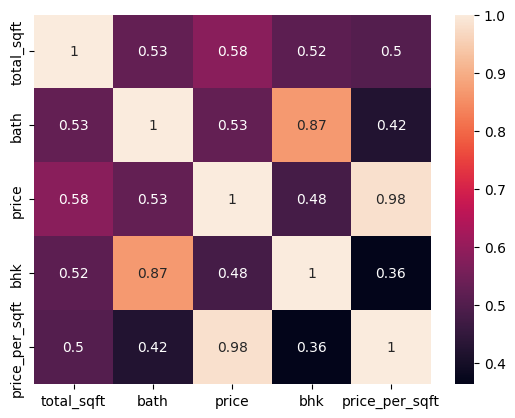

In [40]:
sns.heatmap(df.corr(),annot=True)

C:\Users\Bhanu Pratap\AppData\Local\Temp\ipykernel_15600\1203768356.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


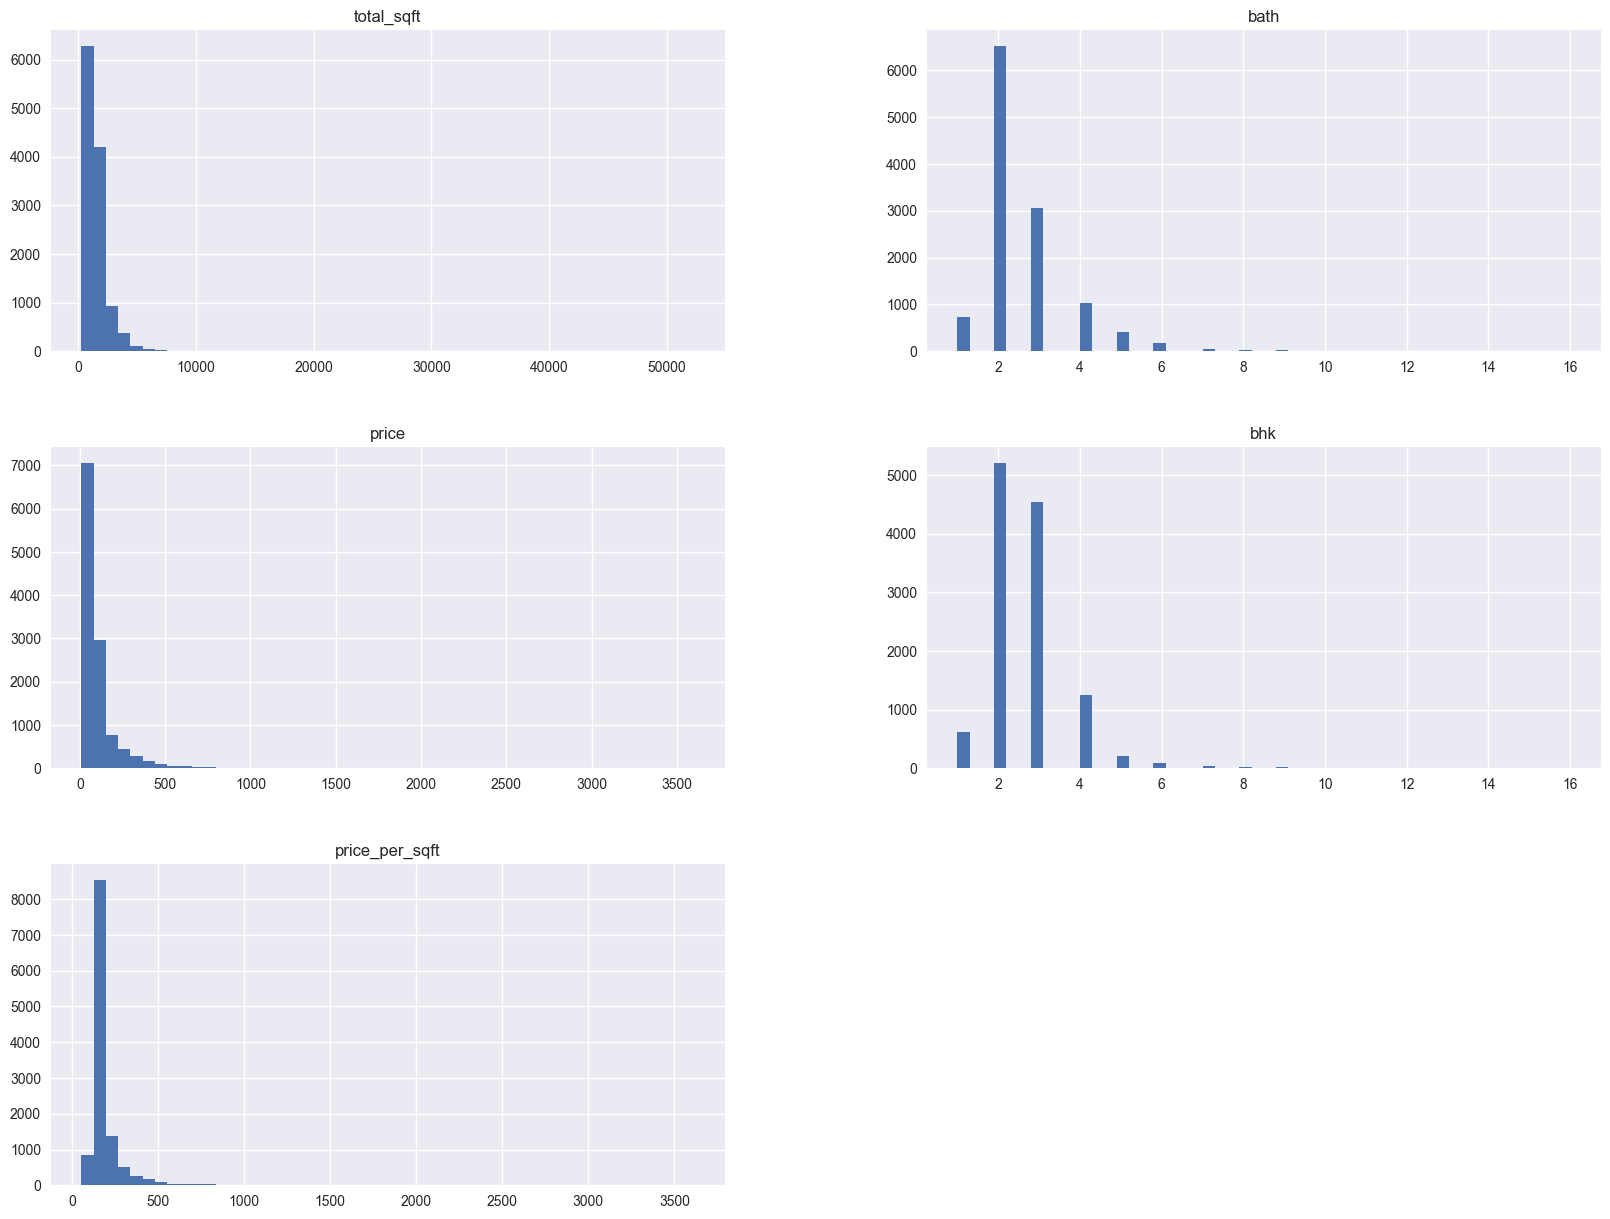

In [41]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [42]:
x=df.drop(columns=["price"])
y=df["price"]

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,r2_score

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [45]:
x_train,y_train

(             location  total_sqft  bath  bhk  price_per_sqft
 5919            other       600.0   2.0    2      196.666667
 2299   Subramanyapura      1245.0   2.0    3      148.321285
 5707            Hoodi      1769.0   3.0    3      153.399112
 12315          Ulsoor      2135.0   3.0    3      216.838407
 3216           Hebbal      1420.0   2.0    2      169.812535
 ...               ...         ...   ...  ...             ...
 3282          Laggere      2800.0   5.0    5      160.714286
 10930           other      1397.0   2.0    3      123.581961
 4396            other      1750.0   5.0    5      507.142857
 2411   Dodda Nekkundi       850.0   2.0    2      145.647059
 3140      Hennur Road      5600.0   5.0    5      532.857143
 
 [9608 rows x 5 columns],
 5919      30.00
 2299      68.00
 5707      96.87
 12315    170.00
 3216      99.39
           ...  
 3282     125.00
 10930     52.00
 4396     450.00
 2411      28.00
 3140     515.00
 Name: price, Length: 9608, dtype: float6

In [46]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),["location"]),remainder="passthrough")

In [47]:
scaler=StandardScaler()

In [48]:
lr=LinearRegression()

In [49]:
pipe=make_pipeline(column_trans,scaler,lr)

In [50]:
pipe.fit(x_train,y_train)

C:\Users\Bhanu Pratap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [51]:
y_pred_lr=pipe.predict(x_test)

In [52]:
print(r2_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))

0.9807257520098883
12.678762817415649


In [53]:
lasso=Lasso()

In [54]:
pipe=make_pipeline(column_trans,scaler,lasso)

In [55]:
pipe.fit(x_train,y_train)

C:\Users\Bhanu Pratap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [56]:
y_pred_laso=pipe.predict(x_test)

In [57]:
print(r2_score(y_test,y_pred_laso))
print(mean_absolute_error(y_test,y_pred_laso))

0.9792364291809683
13.265136844963793


In [58]:
ridge=Ridge()

In [59]:
pipe=make_pipeline(column_trans,scaler,ridge)

In [60]:
pipe.fit(x_train,y_train)

C:\Users\Bhanu Pratap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [61]:
y_pred_ridge=pipe.predict(x_test)

In [62]:
print(r2_score(y_test,y_pred_ridge))
print(mean_absolute_error(y_test,y_pred_ridge))

0.9807185583506471
12.677924434480381


In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xb

In [64]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
adaboost=AdaBoostRegressor()

In [66]:
pipe=make_pipeline(column_trans,scaler,adaboost)

In [67]:
pipe.fit(x_train,y_train)

C:\Users\Bhanu Pratap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('adaboostregressor', AdaBoostRegressor())])

In [68]:
y_pred_adaboost=pipe.predict(x_test)

In [69]:
print(r2_score(y_test,y_pred_adaboost))
print(mean_absolute_error(y_test,y_pred_adaboost))

0.9432349046400739
30.094958550011274


In [70]:
from sklearn.svm import SVR

In [71]:
svm=SVR()

In [72]:
pipe=make_pipeline(column_trans,scaler,svm)

In [73]:
pipe.fit(x_train,y_train)

C:\Users\Bhanu Pratap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('svr', SVR())])

In [74]:
y_pred_svm=pipe.predict(x_test)

In [75]:
print(r2_score(y_test,y_pred_svm))
print(mean_absolute_error(y_test,y_pred_svm))

0.1670223249759466
50.129779168733776


In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
random=RandomForestRegressor()

In [78]:
pipe=make_pipeline(column_trans,scaler,random)

In [79]:
pipe.fit(x_train,y_train)

C:\Users\Bhanu Pratap\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [80]:
y_pred_random=pipe.predict(x_test)

In [81]:
print(r2_score(y_test,y_pred_random))
print(mean_absolute_error(y_test,y_pred_random))

0.9991494749295079
0.8444299833541403
